In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install XlsxWriter

In [3]:
from openpyxl import load_workbook
import xlsxwriter

workbook = xlsxwriter.Workbook('tugas.xlsx')
worksheet = workbook.add_worksheet('data')
data = pd.read_excel("ReviewTerbaru.xlsx", sheet_name="Lokawisata Baturraden")
row=0
col=0
x=data
hasilakhir=list(zip(x.Nama,x.Waktu,x.Rating,x.Review))
worksheet.write(row, col, "ObjekWisata")
worksheet.write(row, col+1, "Nama")
worksheet.write(row, col+2, "Waktu")
worksheet.write(row, col+3, "Rating")
worksheet.write(row, col+4, "Review")
row+=1
for a,b,c,d in (hasilakhir):
    worksheet.write(row, col, "Lokawisata Baturraden")
    worksheet.write(row, col+1, a)
    worksheet.write(row, col+2, b)
    worksheet.write(row, col+3, c)
    worksheet.write(row, col+4, d)
    row+=1
data = pd.read_excel("ReviewTerbaru.xlsx", sheet_name="Taman Andhang Pangrenan")
x=data
hasilakhir=list(zip(x.Nama,x.Waktu,x.Rating,x.Review))
for a,b,c,d in (hasilakhir):
    worksheet.write(row, col, "Taman Andhang Pangrenan")
    worksheet.write(row, col+1, a)
    worksheet.write(row, col+2, b)
    worksheet.write(row, col+3, c)
    worksheet.write(row, col+4, d)
    row+=1
data = pd.read_excel("ReviewTerbaru.xlsx", sheet_name="Curug Telu")
x=data
hasilakhir=list(zip(x.Nama,x.Waktu,x.Rating,x.Review))
for a,b,c,d in (hasilakhir):
    worksheet.write(row, col, "Curug Telu")
    worksheet.write(row, col+1, a)
    worksheet.write(row, col+2, b)
    worksheet.write(row, col+3, c)
    worksheet.write(row, col+4, d)
    row+=1
workbook.close()

In [4]:
#LOAD DICTIONARY
baca=pd.read_excel('tugas.xlsx', sheet_name='data')
baca

,ObjekWisata,Nama,Waktu,Rating,Review
0,Lokawisata Baturraden,Sonia Soraya,3 minggu lalu,5 bintang,Bismillah tadi kita ke ke sana.. Pas masuk di...
1,Lokawisata Baturraden,Andy Kristyagita,sebulan lalu,5 bintang,Walaupun sudah berulang kali ke sini semenjak ...
2,Lokawisata Baturraden,Edza Tamara,2 minggu lalu,5 bintang,Suasanan malam hari di lokawisata baturraden n...
3,Lokawisata Baturraden,Abrakadabra,seminggu lalu,5 bintang,"Tempat nya sangat Bersih Dan rapih, butuh stam..."
4,Lokawisata Baturraden,Riko Tampati,sebulan lalu,4 bintang,"Masih masa lebaran, tiket masuk agak mahal 25r..."
...,...,...,...,...,...
905,Curug Telu,Rahman H. Nugroho,4 tahun lalu,5 bintang,Curug telu sangat dianjurkan untuk dikunjungi ...
906,Curug Telu,Whisnu Sanjaya,8 bulan lalu,5 bintang,Bagus..
907,Curug Telu,Ikbal Awaludin,2 tahun lalu,5 bintang,"Tempatnya adem, sejuk, bersih, dan hutannya ma..."
908,Curug Telu,Daffa Zaki,setahun lalu,4 bintang,lumayan buat mandi


In [5]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [6]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

slangs={'yg':'yang', 'tdk':'tidak', 'pd':'pada', 'mlh':'malah',
        'jgn':'jangan', 'jg':'juga', 'tp':'tapi', 'blkg': 'belakang', 
        'dr':'dari', 'klo':'kalo', 'lg':'lagi'}

processed_comments = []

for sentence in baca['Review']:
    # Remove all the special characters
    processed_comment = re.sub(r'\W', ' ', str(sentence))
    
    # Converting to Lowercase
    processed_comment = processed_comment.lower()
    
    #Remove number 
    processed_comment = re.sub(r'\d+', ' ', processed_comment)

    # remove all single characters
    processed_comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_comment)
    
    #remove duplicate character
    pattern=re.compile(r"(.)\1{1,}",re.DOTALL)
    processed_comment=pattern.sub(r"\1",processed_comment)

    #Corrected Slang words
    words = processed_comment.split()
    rfrm=[slangs[word] if word in slangs else word for word in words]
    processed_comment= " ".join(rfrm)

    #remove stopword
    factory = StopWordRemoverFactory()
    more_stopword = ['tak', 'jd', 'per', 'nya'] #menambahkan stopword
    stopwords = factory.get_stop_words() + more_stopword
    temp = [t for t in re.findall(r'\b[a-z]+-?[a-z]+\b',processed_comment) if t not in stopwords]
    processed_comment = ' '.join(temp)

    #stemming
    stemmer = StemmerFactory().create_stemmer()
    processed_comment = stemmer.stem(processed_comment)

    #Subtitusing multiple spaces with single space
    processed_comment = re.sub(r'\s+', ' ', processed_comment, flags=re.I)

    processed_comments.append(processed_comment)

In [7]:
processed_comments

['bismilah tadi sana pas masuk suru cuci tangan pakai masker tugas banyak protokol sehat banget deh depan dalem ingetin pake spiker tempat sedia kursi roda sedia pos depan tempat tata banget cakep indah cantik banyak sekali destinasi kunjunganya pesawat monumen monumen mandi air belerang mandi kolem renang depan cocok banget anak belakang prosotan sih cuma ga pancur anya kaya depan mandi air panas banyak cobain atuh cobain sana banyak jual aksesoris jajan ringan sampe berat ain karpet banyak buat tempat duduk penting cakep banyak buat foto luas senang sekali sini sama keluarga buat tonton film main lai banyak sekali jangan lupa bawa uang banyak hehe kalau masuk bayar iya unik sedia rute kursi roda ruang khusus susu waw lengkap banget tadi berangkat pancur naik angkot terus kesana rb orang pas pulang pintu naik ojek rb orang iya nawarin foto langsung jadi kok',
 'walaupun ulang kali sini semenjak kecil rasa bosan unjung area luas bersih hijau nyaman banyak wahana pandang indah cocok cuc

In [8]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [9]:
#SAVE HASIL PREPROCESSING
import xlsxwriter
workbook = xlsxwriter.Workbook('tugas-hasilpreprocessing.xlsx', {'nan_inf_to_errors': True})
worksheet=workbook.add_worksheet()
row=0
col=0
x=baca
hasilakhir=list(zip(x.ObjekWisata,x.Nama,x.Waktu,x.Rating,x.Review,processed_comments))
worksheet.write(row, col, "ObjekWisata")
worksheet.write(row, col+1, "Nama")
worksheet.write(row, col+2, "Waktu")
worksheet.write(row, col+3, "Rating")
worksheet.write(row, col+4, "Review")
worksheet.write(row, col+5, "CleanReview")
row+=1
for a,b,c,d,e,f in (hasilakhir):
    worksheet.write(row, col, a)
    worksheet.write(row, col+1, b)
    worksheet.write(row, col+2, c)
    worksheet.write(row, col+3, d)
    worksheet.write(row, col+4, e)
    worksheet.write(row, col+5, f)
    row+=1
workbook.close()

In [10]:
#JIKA PREPROCESSING SUDAH ADA, MAKA PROSES DIAWALI DARI SINI
dataset = pd.read_excel('tugas-hasilpreprocessing.xlsx', sheet_name='Sheet1')
dataset['Number_of_words'] = dataset['CleanReview'].apply(lambda x:len(str(x).split()))
dataset.drop(dataset[dataset["Number_of_words"]<2].index, inplace = True)

In [11]:
#LOAD DICTIONARY
dictionary=pd.read_excel('NRC.xlsx', sheet_name='dict')
dictionary

,English (en),Indonesian (id),Javanese (jw),Malay (ms),Sundanese (su),Tagalog (Filipino) (tl),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,kembali,aback,abak,aback,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,sempoa,abacus,abacus,abacus,abako,0,0,0,0,0,0,0,0,0,1
2,abandon,mengabaikan,nglirwaaken,abaikan,ninggalkeun,abandunahin,0,1,0,0,0,1,0,1,0,0
3,abandoned,ditinggalkan,ditinggal,ditinggalkan,ditinggalkeun,inabandunang,0,1,1,0,0,1,0,1,0,0
4,abandonment,ditinggalkan,abandonment,ditinggalkan,abandonment,pag-abanduna,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14188,zone,daerah,zona,Kawasan,wewengkon,zone,0,0,0,0,0,0,0,0,0,0
14189,zoo,kebun binatang,zoo,zoo,kebon sasatoan,zoo,0,0,0,0,0,0,0,0,0,0
14190,zoological,kehewanan,zoological,zoologi,Zoological,zoological,0,0,0,0,0,0,0,0,0,0
14191,zoology,ilmu hewan,zoologi,zoologi,elmu sasatoan,zoology,0,0,0,0,0,0,0,0,0,0


In [12]:
#Load NRC to memory
positive=[]
negative=[]
#teksbaru=''
for i in range(1,len(dictionary)):
    kata=dictionary.iloc[i,1]
    #print(kata)
    if (dictionary.iloc[i,6])==1:
        positive.append(kata)
    if (dictionary.iloc[i,7])==1:
        negative.append(kata)

In [13]:
processed_comments=dataset['CleanReview']
#print('Panjang :',len(processed_comments))
datasetangkapos=[]
for kalimat in processed_comments:
    baris=[]
    baris.append(kalimat)
    #ekstraksi fitur
    f_sentimenpositif=0
    f_sentimennegatif=0
    y=kalimat
    for teks in y.split():
        for j in range(0,len(positive)-1):
            if teks==positive[j]:
                f_sentimenpositif+=1
        for j in range(0,len(negative)-1):
            if teks==negative[j]:
                f_sentimennegatif+=1

    # l_sentimen=f_sentimenpositif-f_sentimennegatif
    l_sentimenne=0
    l_sentimenp=0
    l_sentimenn=0

    #menentukan label
    if f_sentimenpositif-f_sentimennegatif==0:
        l_sentimenne=0
    else:
        if f_sentimenpositif-f_sentimennegatif>0:
            l_sentimenp=1
        else:
            l_sentimenn=-1
    baris.append(l_sentimenp) #dataset(3)
    baris.append(l_sentimenn) #dataset(3)
    datasetangkapos.append(baris)

In [14]:
datasetangkapos

[['bismilah tadi sana pas masuk suru cuci tangan pakai masker tugas banyak protokol sehat banget deh depan dalem ingetin pake spiker tempat sedia kursi roda sedia pos depan tempat tata banget cakep indah cantik banyak sekali destinasi kunjunganya pesawat monumen monumen mandi air belerang mandi kolem renang depan cocok banget anak belakang prosotan sih cuma ga pancur anya kaya depan mandi air panas banyak cobain atuh cobain sana banyak jual aksesoris jajan ringan sampe berat ain karpet banyak buat tempat duduk penting cakep banyak buat foto luas senang sekali sini sama keluarga buat tonton film main lai banyak sekali jangan lupa bawa uang banyak hehe kalau masuk bayar iya unik sedia rute kursi roda ruang khusus susu waw lengkap banget tadi berangkat pancur naik angkot terus kesana rb orang pas pulang pintu naik ojek rb orang iya nawarin foto langsung jadi kok',
  1,
  0],
 ['walaupun ulang kali sini semenjak kecil rasa bosan unjung area luas bersih hijau nyaman banyak wahana pandang in

In [15]:
dataset_labelled=pd.DataFrame(datasetangkapos, columns=['Review','Positif','Negatif'])

In [16]:
dataset_labelled

,Review,Positif,Negatif
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0
2,suasanan malam hari lokawisata baturaden nih s...,1,0
3,tempat sangat bersih rapih butuh stamina utama...,1,0
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1
...,...,...,...
883,kelola desa tata lila baik banyak tempat sampa...,0,-1
884,curug telu sangat anjur kunjung jangan lupa ab...,1,0
885,tempat adem sejuk bersih hutanya jaga saran ku...,0,-1
886,lumayan buat mandi,1,0


In [17]:
dataset_labelled.to_excel("tugas-output_labelling-NRC.xlsx", index=False)

In [18]:
data_berlabel=pd.read_excel("tugas-output_labelling-NRC.xlsx")
data_berlabel

,Review,Positif,Negatif
0,bismilah tadi sana pas masuk suru cuci tangan ...,1,0
1,walaupun ulang kali sini semenjak kecil rasa b...,1,0
2,suasanan malam hari lokawisata baturaden nih s...,1,0
3,tempat sangat bersih rapih butuh stamina utama...,1,0
4,masa lebaran tiket masuk mahal rb sangat ramai...,0,-1
...,...,...,...
883,kelola desa tata lila baik banyak tempat sampa...,0,-1
884,curug telu sangat anjur kunjung jangan lupa ab...,1,0
885,tempat adem sejuk bersih hutanya jaga saran ku...,0,-1
886,lumayan buat mandi,1,0


In [19]:
positif=data_berlabel['Positif'].sum()
negatif=data_berlabel['Negatif'].sum()*-1
print('Sentimen Positif=',positif)
print('Sentimen Negatif=',negatif)

Sentimen Positif= 699
Sentimen Negatif= 91


[699, 91]


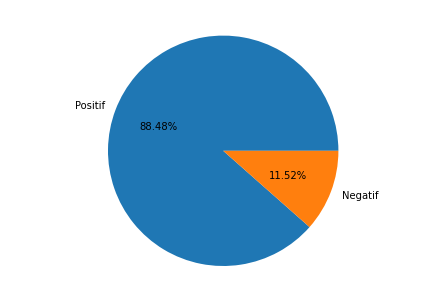

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
sentimen=['Positif', 'Negatif']
jumlah=[positif,negatif]
print(jumlah)
ax.pie(jumlah,labels=sentimen, autopct='%1.2f%%')
plt.show()